# __Procesamiento de Imagenes__
# __Proyecto Final__

__Semestre__: Otoño 2022

__Profesor:__ Jorge Ángel González Ordiano

__Objetivo de Evaluación:__ Demostrar las habilidades para resolver un problema de procesamiento de imágenes (desde la captura de las imágenes a utilizar hasta la resolución del problema) mediante los conocimientos teóricos y habilidades de programación desarrolladas en clase.

__Planteamiento del problema:__ En clase aprendimos como ir de un conjunto de imágenes digitales hasta la clasificación de los objetos que se encuentran en éstas. Como se menciona en el objetivo de evaluación, este proyecto busca que utilicen todas las habilidades y conocimientos que han desarrollado a través del semestre para resolver un problema real de procesamiento de imágenes.
El proyecto girará en torno a lo siguiente: imaginemos que una compañía quiere diseñar una aplicación de celular capaz de clasificar dos objetos distintos y les está pidiendo a ustedes que desarrollen un sistema de procesamiento de imágenes capaz de distinguir entre estos dos objetos. Llegar a este sistema es el objetivo de su proyecto final.

__Planteamiento del problema:__ Para lograr el objetivo planteado, su proyecto se dividirá en tres partes: la captura de imágenes, la segmentación de objetos de interés y la clasificación de estos objetos.

__Fecha de entrega:__ 2 de diciembre de 2022


__Nombres:__ Ana Regina Morfin Marquez y David Emmanuel Pérez Avila

# Lata vs. Botella de CocaCola


# 1: Captura de imagenes e importación

Se capturaron las 50 imagenes de cada objeto y se importan en esta sección. Las librerías necesarias para el proyecto también se deben importar a continuación.



__Objetos seleccionados__

> Los objetos que se seleccionaron fueron una lata de aluminio y una botella de plástico de Coca Cola, ya que son objetos similares pero tienen diferencias significantes que podrían ser utilizadas para distinguirlos. Más allá del procesamiento de la imagen como tal, nos pareció interesante la idea de diferenciar una lata y una botella ya que puede tener aplicaciones reales y contrubuir por ejemplo, en el medio de reciclaje de diferentes materiales.

__Consideraciones en la captura de imágenes__

> Para la captura de las 100 imagenes (50 por cada objeto), se tuvieron que considerar las siguientes variables:
* Fondo: Liso y neutro para evitar que se confunda con el objeto. Se utilizó un fondo de tela blanca.
* Velocidad de obturación: Se utilizó una velocidad alta procurando que estuviera entre 1/250 y 1/2000 para evitar fotos movidas.
* Iluminación: Se cuidó la iluminación para tener control de las fuentes, utilizando luz natural de un lado, y luz blanca del otro para intentar que fuera lo más pareja posible y evitar sombras raras.
* Composición: Se procuró que el objeto estuviera centrado en todo momento, o dentro del cuadro de la imagen para que no se corten partes, pues eso podría afectar las características.
* Ángulo: Las imágenes se tomaron del mismo ángulo (o con pequeñas variaciones en el eje x y y) y se rotó el objeto para capturar diferentes partes del mismo.
* Resolución: Al momento de la captura, las fotos se tomaron con la más alta resolución de la cámara para facilitar su procesamiento en Adobe Photoshop.
* Sensibilidad ISO: Se utilizó ISO de 100 y 200 (intentando que sea lo más bajo posible) para evitar ruido y grain.
* Procesamiento RAW: Las imágenes se capturaron en RAW pues contiene mayor información, en Adobe Photoshop las transformamos a blanco y negro, las cambiamos a JPG y disminuimos el tamaño para guardarlas en Dropbox.

Las imágenes se encuentran guardadas en Dropbox y más adelante se encuentra el código para cargarlas.
* Botellas de plástico: https://www.dropbox.com/s/a34jt94mdvvdwp7/plasticoJPG.zip?dl=0
* Latas de alumninio: https://www.dropbox.com/s/ww6gok6v5uc81cf/latasJPG.zip?dl=0A

__Equipo para la captura de imágenes__

> Se utilizó una cámara Canon Rebel SL1 con un lente Canon 50mm f1.8 en formato RAW.



In [ ]:
#Cargar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.segmentation import watershed
from skimage.transform import rescale
from scipy.ndimage.morphology import binary_opening
from scipy.ndimage.morphology import binary_closing
from skimage import filters
from skimage.measure import label, regionprops, regionprops_table
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Codigo para cargar las 100 imagenes
!wget "https://www.dropbox.com/s/a34jt94mdvvdwp7/plasticoJPG.zip?dl=0" -O "plastico.zip"
!unzip "plastico.zip"
!wget "https://www.dropbox.com/s/ww6gok6v5uc81cf/latasJPG.zip?dl=0A" -O "latas.zip"
!unzip "latas.zip"

--2022-12-01 16:46:24--  https://www.dropbox.com/s/a34jt94mdvvdwp7/plasticoJPG.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/a34jt94mdvvdwp7/plasticoJPG.zip [following]
--2022-12-01 16:46:25--  https://www.dropbox.com/s/raw/a34jt94mdvvdwp7/plasticoJPG.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc232d3fd425992787d48ea40b62.dl.dropboxusercontent.com/cd/0/inline/Bxz_VP5CRYZ97ZEfavZ8-54YAZ2I5KK-IqhlopaUytt8_rn8LkwP8vVDM7Nq1UIYnnSAyyzZ1g7NW4RCtnfbTf7nELfZGgnFDwxM8Dv3igCFL5l47WxmzQzEPCwPsx2NNxg6MmL0yKcT3bRT1Zd2dDlvKR-iHyoSlFGNGHkOUjrVaw/file# [following]
--2022-12-01 16:46:25--  https://uc232d3fd425992787d48ea40b62.dl.dropboxusercontent.com/cd/0/inline/Bxz_VP5CRYZ97ZEfavZ8-54YAZ2I5KK-IqhlopaUytt8_rn8LkwP8vVDM7Nq1UIYnn

In [ ]:
#Codigo para escalarlas y pasarlas a blanco y negro
#Se hace 2 arreglos llamados latas y platicos, donde se guardaran todas las imagenes

latas=[]
plasticos=[]

for i in range(1, 51):
  lata=io.imread("/content/latasJPG/c" + str(i)+ ".jpg")
  lata_2=rgb2gray(lata)
  lata = rescale(lata_2,(0.2,0.2))
  latas.append(lata)

  botella=io.imread("/content/plasticoJPG/p" + str(i)+ ".jpg")
  botella_2=rgb2gray(botella)
  botella= rescale(botella_2,(0.2,0.2))
  plasticos.append(botella)


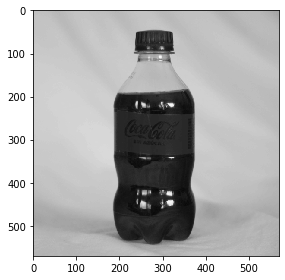

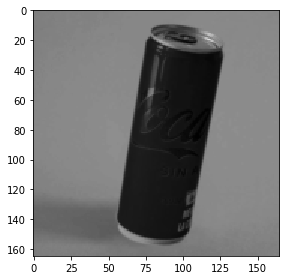

In [ ]:
#Ejemplo de cada objeto
io.imshow(botella, cmap = "gray")
plt.figure()
io.imshow(lata, cmap = "gray")

# 2: Segmentación de objetos de interés

Se segmentan las imágenes con el fin de obtener imágenes binarias donde los ceros son el fondo y los unos los objetos de interés.


# Nota: Se requiere la creación manual de los folders latas_binJPG y plastico_binJPG

In [ ]:
#Función segmentación
def segmentation_thresh(img,thresh):
  #img: imagen
  #thresh: umbral
  img_segmented = np.zeros(np.shape(img))
  for i in range(0, np.shape(img)[0]):
    for j in range(0, np.shape(img)[1]):
      if img[i][j] >= thresh:
        img_segmented[i][j]=1
  return img_segmented

In [ ]:
#Función de estructura para Apertura y Cierre
def create_structElem(structElem_type):
  structElem=np.zeros([10,10])
  if structElem_type == 1:
    structElem=np.ones([10,10])
  if structElem_type == 0:
    structElem=np.ones([10,10])
    structElem[0][0] = 0
    structElem[0][2] = 0
    structElem[2][0] = 0
    structElem[2][2] = 0
  return structElem

In [ ]:
#Función segmentación: Sobel, Otsu, Apertura y Cierre
def sobel_otsu(elemento):
  elemento_bin=[]
  cuadrado=create_structElem(1)
  for i in range(0, 50):
    #Sobel
    img_bin_sobel=filters.sobel(elemento[i])
    img_bin_sobel_01=img_bin_sobel/np.max(img_bin_sobel)
    img_bin_sobel_bin=(img_bin_sobel_01 >0.06).astype("int")
    img_water = watershed(img_bin_sobel_bin) #aplicamos el algoritmo de watershed

    #Otsu
    threshold=threshold_otsu(img_water)
    binaria = segmentation_thresh(img_water,threshold)

    #Opening
    apertura = binary_opening(binaria, cuadrado).astype("int")

    #Closing
    cierre = binary_closing(apertura, cuadrado).astype("int")

    elemento_bin.append(cierre)

  return elemento_bin

In [ ]:
#Codigo para sacar las segmentaciones
latas_bin = sobel_otsu(latas)
plasticos_bin = sobel_otsu(plasticos)

In [ ]:
#Guardar imagenes binarias como jpg
for i in range(0, 50):
  io.imsave("latas_binJPG/l_bin" + str(i) + ".jpg", latas_bin[i].astype("uint8") *255)
  io.imsave("plastico_binJPG/p_bin" + str(i) + ".jpg", plasticos_bin[i].astype("uint8") *255)

#Hacer zip
!zip -r latas_bin.zip /content/latas_binJPG
!zip -r plastico_bin.zip /content/plastico_binJPG

  adding: content/latas_binJPG/ (stored 0%)
  adding: content/latas_binJPG/l_bin6.jpg (deflated 43%)
  adding: content/latas_binJPG/l_bin4.jpg (deflated 11%)
  adding: content/latas_binJPG/l_bin2.jpg (deflated 37%)
  adding: content/latas_binJPG/l_bin42.jpg (deflated 42%)
  adding: content/latas_binJPG/l_bin41.jpg (deflated 43%)
  adding: content/latas_binJPG/l_bin15.jpg (deflated 54%)
  adding: content/latas_binJPG/l_bin32.jpg (deflated 35%)
  adding: content/latas_binJPG/l_bin44.jpg (deflated 30%)
  adding: content/latas_binJPG/l_bin28.jpg (deflated 13%)
  adding: content/latas_binJPG/l_bin12.jpg (deflated 46%)
  adding: content/latas_binJPG/l_bin25.jpg (deflated 15%)
  adding: content/latas_binJPG/l_bin0.jpg (deflated 44%)
  adding: content/latas_binJPG/l_bin39.jpg (deflated 37%)
  adding: content/latas_binJPG/l_bin3.jpg (deflated 16%)
  adding: content/latas_binJPG/l_bin21.jpg (deflated 52%)
  adding: content/latas_binJPG/l_bin49.jpg (deflated 7%)
  adding: content/latas_binJPG/l_b

__Proceso__
>
1. Primero se aplicó Sobel para detectar cambios de intensidad.
2. Se ajustan los rangos de intensidad.
3. Se indica la intensidad para encontrar el objeto de interés. (0.06)
4. Se aplica watershed.
5. Se aplica Otsu a la imagen con watershed.
6. Se segmenta con el threshold para tener una imagen binaria.
7. Se aplica una apertura a la imagen binaria y después un cierre para eliminar huecos y juntar al objeto.

__Justificación__
> Los métodos se seleccionaron para tener una segmentación eficaz. Al momento de realizar pruebas, intentamos hacer el thereshold de la original, pero marcaba todo el texto del interior del objeto, también movimos su valor pero no seleccionaba al objeto de interés o se excedía. También realizamos pruebas con las cierre y apertura para mejorar la selección del objeto de interés y probamos con estructura cuadrada de diferente tamaño, donde 10x10 funcionó mejor.



# Acceso a imagenes binarias:
Latas: https://www.dropbox.com/sh/tl8qgqd3rm0yomk/AACUZP9mwts_D6-uhiBgoeVoa?dl=0

Plastico: https://www.dropbox.com/sh/af06oqzcjqwn7jo/AABH5dRyA9I0_Pz6OJPTLkSLa?dl=0


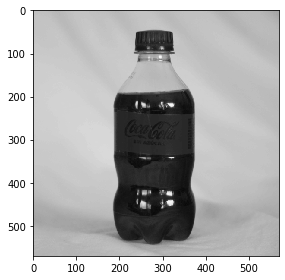

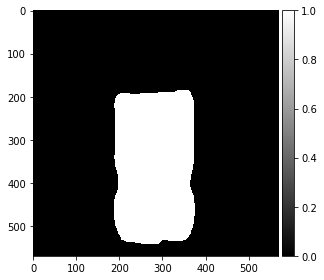

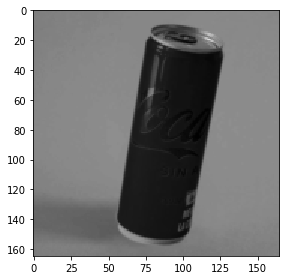

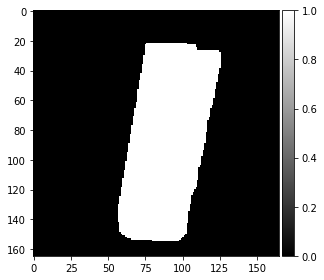

In [ ]:
#Ejemplo de imagen original y su máscara binaria

#Botella
io.imshow(botella, cmap = "gray")
plt.figure()
io.imshow(plasticos_bin[49], cmap = "gray")
plt.figure()

#Lata
io.imshow(lata, cmap = "gray")
plt.figure()
io.imshow(latas_bin[49], cmap = "gray")

# 3: Clasificación de objetos

Se extraen características para entrenar modelos de clasificación de cada clase. Los modelos que se entrenan son árbol y K-vecinos. Los datos se dividen en 70% entrenamiento y 30% validación. Con el F-score se evaluan para definir cuál es mejor.




__Características__
> Una vez seleccionado el objeto más grande (el objeto de interés), se seleccionaron las siguientes características en base a nuestros objetos:
* Eccentricidad
* Compacidad
* Relación de circularidad

La eccentricidad nos da información del ratio de las distancias, en nuestro caso es más larga la lata por lo que tiene una mayor eccentricidad que la botella. Tanto la compacidad como la relación de circularidad utilizan al perímetro y área. Las botellas tienden a tener mayor compacidad y menor relación de circularidad que las latas. La relación de circularidad también varía debido a que los dos objetos tienen una forma diferente.

__Métodos de Clasificación__
> Los métodos de clasificación que se seleccionaron fueron: Árbol y K-vecinos.
* El árbol se seleccionó ya que al observar las características, se muestra un problema separable y nos interesaba ver el diagrama del árbol en sí.
* K-vecinos se eligió para analizar cómo afectaban a la clasificación, los vecinos cercanos.

__Resultados e interpretación__
> Los resultados que se obtuvieron fueron de 1.0 en el F-score, lo que significa que nuestros modelos funcionan muy bien. Se puede interpretar que del 100% de las imagenes que le alimentamos, identifica correctamente qué es en el 100% de los casos.

__Mejor método__
> Ambos métodos obtuvieron el mismo resultado por lo que teóricamente no se puede decir cual es mejor. Sin embargo, al tomar en consideración si algunos datos hubieran tenido anomalías, el de arboles sería más eficaz.

__Posibles mejoras__
> Si dispusieramos de más tiempo, sería interesante probar con imagenes a color y de marcas diferentes de refrescos, para usar como característica el color y probar con una mayor fuente de datos. De igual manera, creo que sería interesante probar la segmentación de los mismos objetos pero con fondos diferentes, para poder identificar los objetos en más contextos.


In [ ]:
def saca_propiedades(imags_bin, etiquetas, propiedades, etiqueta):
  for a in range(etiqueta * 50 , etiqueta*50 + 50):
   imgbin = imags_bin[a - (etiqueta*50)]
   label_img = label(imgbin)
   regions = regionprops(label_img)
   num_regiones = (len(regions))

   #Identificar el objeto más grande
   if num_regiones > 1:
       area = -1
       for i in range (0, num_regiones):
         if area < regions[i].area:
          area = regions[i].area
         indice = i
   else:
      indice = 0

  #Propiedades
   ecc = regions[indice].eccentricity
   perimetro = regions[indice].perimeter
   area = regions[indice].area
   compacidad=perimetro**2/area
   rel_circularidad=4*np.pi*area/perimetro**2
   propiedades[a] = [ecc, compacidad, rel_circularidad]
  #Botella es 1
   etiquetas[a] = etiqueta

  return 1


In [ ]:
def propiedades_etiquetas(imgs1, imgs2):
  propiedades = np.zeros([100,3])
  etiquetas = np.zeros([100])
  saca_propiedades(imgs1, etiquetas,propiedades, 0)
  saca_propiedades(imgs2, etiquetas,propiedades, 1)
  return propiedades, etiquetas

In [ ]:
#Codigo para obtener las propiedades y ponerlas en arreglo
propiedades, etiquetas = propiedades_etiquetas(latas_bin, plasticos_bin)

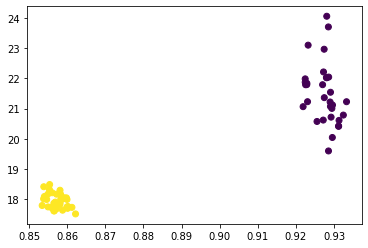

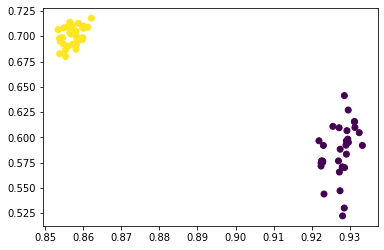

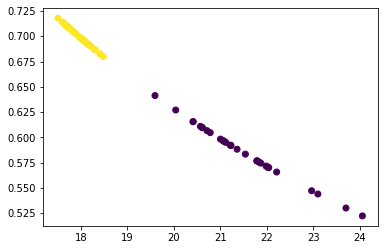

In [ ]:
#División 70% train, 30% test
X_train, X_test, y_train, y_test=train_test_split(propiedades,etiquetas,test_size=0.3, random_state=42)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.figure()
plt.scatter(X_train[:,0], X_train[:,2], c=y_train)
plt.figure()
plt.scatter(X_train[:,1], X_train[:,2], c=y_train)

In [ ]:
#Función F-score
def eval_model(y_test,y_pred):
  TP = (y_test * y_pred).sum()
  FP = ((1-y_test) * y_pred).sum()
  FN = (y_test * (1-y_pred)).sum()

  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  FScore = (2 * precision * recall)/ (precision + recall)

  return FScore

Árbol

[Text(0.5, 0.75, 'X[2] <= 0.661\ngini = 0.498\nsamples = 70\nvalue = [33, 37]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]')]

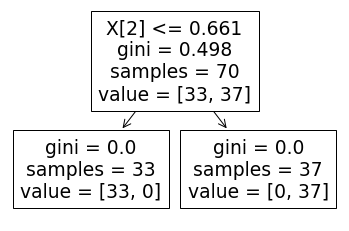

In [ ]:
#Codigo para árbol
arbolito=DecisionTreeClassifier()
arbolito.fit(X_train, y_train)
tree.plot_tree(arbolito)

In [ ]:
y_predict = arbolito.predict(X_test)

In [ ]:
eval_model(y_test,y_predict)

1.0

K- vecinos

In [ ]:
#Codigo para K-vecinos
vecinos3=KNeighborsClassifier(3)
vecinos3.fit(X_train, y_train)
y_pred_vecinos = vecinos3.predict(X_test)

In [ ]:
eval_model(y_test,y_pred_vecinos)

1.0